# Load Packages

In [1]:
# scikit-learn, scikit-image are needed
# If those packages are missed, then, install them by using the following command
# pip install scikit-learn scikit-image

import os

import sklearn.datasets
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

import skimage.io
import skimage.transform
import skimage.color

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [2]:
# Load additional scikit learn packages! if you need
import sklearn.gaussian_process
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Load Data Points (Do not modify the following block)

In [3]:
image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images = []
y = []
for i in labels:
    folderPath = os.path.join('./tumor_dataset/Training',i)
    for j in os.listdir(folderPath):
        img = skimage.io.imread(os.path.join(folderPath,j),)
        img = skimage.transform.resize(img,(image_size,image_size))
        img = skimage.color.rgb2gray(img)
        images.append(img)
        y.append(i)
        
images = np.array(images)

X = images.reshape((-1, image_size**2))
y = np.array(y)

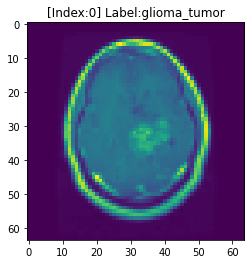

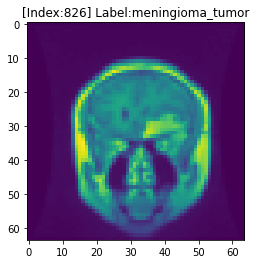

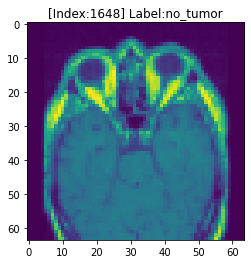

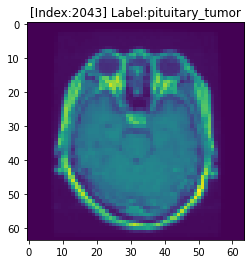

In [4]:
j = 0
for i in range(len(y)):
    if y[i] in labels[j]:
        plt.imshow(images[i])
        plt.title("[Index:{}] Label:{}".format(i, y[i]))
        plt.show()
        j += 1
    if j >= len(labels):
        break

In [5]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for tumor classification
- Find the best random seed as well and fix it to reproduce your result on other computers.

In [12]:
#TODO
#1. Create a classification object in scikit learn package (such as perceptron, logistic regression, or other classification algorithms)
#2. Fit the object to training dataset
#3. Predict the label of test data point (X_test)
# - Do not change the variable name "y_pred"

model = sklearn.ensemble.RandomForestClassifier(max_features= "sqrt", min_samples_leaf= 1, min_samples_split= 5)
model.fit(X_train,y_train)

#param_grid = {
#    'n_estimators': [10, 50, 100, 200],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}


#grid_ search = GridSearchCV(estimator = model,param_grid = param_grid, scoring ='accuracy')
#grid_search.fit(X_train, y_train)



RandomForestClassifier(min_samples_split=5)

### Print accuracy (do not modify the following block)

In [14]:
#y_pred = grid_search.predict(X_test)
y_pred = model.predict(X_test)
#print('파라미터: ', grid_search.best_params_)
#print('예측 정확도: {:.4f}'.format(grid_search.best_score_))
#print('Accuracy: %.4f' % sklearn.metrics.accuracy_score(y_test, y_pred))
print('Accuracy: %.4f' % sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8908
